# Exploratory Data Analysis
---

  1. Import packages
  2. Loading data with Pandas
  3. Descriptive satistics of data
  4. Data visualization

---

## 1. Import packages
  

In [9]:
# warnings is a built-in Python module used to handle warning messages.
import warnings
"""filterwarnings("ignore", category=FutureWarning) tells
Python to ignore warnings that belong to the FutureWarning category
(common in libraries like Pandas when upcoming changes are announced).
This keeps the output cleaner."""
warnings.filterwarnings("ignore", category=FutureWarning)


In [10]:
from google.colab import files
uploaded = files.upload()

Saving price_data (1).csv to price_data (1).csv
Saving client_data (1).csv to client_data (1).csv


In [11]:
# popular Python libraries for data visualization both matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# pd is used for data manipulation and analysis.
import pandas as pd

# Shows plots in jupiter notebook
"""is a magic command for
Jupyter notebooks to display plots inside the notebook."""
%matplotlib inline

# Set plot style
"""customizes Seaborn’s plot styling
to use color-coded labels for better clarity."""
sns.set(color_codes = True)


---

## 2. Loading the data with Pandas

We need to load 'client_data.csv' and 'price_data.csv' into individual data frames so that we can worl wwith them in python.


In [12]:
# pd.read_csv() is used to load CSV files into pandas DataFrames.
# client_df will contain all the client-related data.
client_df = pd.read_csv('client_data (1).csv')
# price_df will contain all the price-related data.
price_df = pd.read_csv('price_data (1).csv')

Looking at the first 3 rows of both dataframes to see what the data looks like.

In [13]:
client_df.head(3)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0


With the client data, we have a mix of mumeric and categorical data, which we will need to transform later before modelling later

In [14]:
price_df.head(3)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0


With the price data, it is purely numeric data but we can see a lot of zeroes

---

## 3. Descriptive satistics of data

### Data types

It is useful to first understand the data that we'ra dealing with along with the data types of each column. The data types may dictate how we transform and engineer features.

In [15]:
client_df.info()

"""
info() is a built-in method that provides:
- Number of non-null entries per column
- Data types of each column
- Memory usage
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

'\ninfo() is a built-in method that provides:\n- Number of non-null entries per column\n- Data types of each column\n- Memory usage\n'

In [16]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


As we can see that all the 'datetime' related columns are not currently in datetime format. We will need to convert these later.

### Statistics
Now let's look at some satistics about the datasets

In [17]:
client_df.describe()

"""
'.describe()' gives a statistical summary of all numeric columns in the DataFrame.
It includes:
- count: Number of non-null values
- mean: Average value
- std: Standard deviation (how spread out the data is)
- min: Minimum value
- 25%, 50%, 75%: Percentiles (also called quartiles)
- max: Maximum value
This helps us understand data distribution,
outliers, and scale of each feature.
"""

"\n'.describe()' gives a statistical summary of all numeric columns in the DataFrame.\nIt includes:\n- count: Number of non-null values\n- mean: Average value\n- std: Standard deviation (how spread out the data is)\n- min: Minimum value\n- 25%, 50%, 75%: Percentiles (also called quartiles)\n- max: Maximum value\nThis helps us understand data distribution,\noutliers, and scale of each feature.\n"

The describe method gives us a lot of information about the client data. The key point to take away from this is that we have highly skewed data, as exhibited by the percentile values.


### CONCEPT USED:
-> “highly skewed data”
- *Skewed data means:*
-- The values are not evenly distributed around the mean. The data is "tilted" or "stretched" more on one side.

*When data is right-skewed (positively skewed):*
- Many small values and few very large values
- The mean > median
- Long tail to the right
-> Example: Income data — most people earn between ₹20k–₹80k, but a few earn ₹5 lakhs or more, pulling the mean up.

*When data is left-skewed (negatively skewed):*
- Many large values and few very small values
- The mean < median
- Long tail to the left

*In describe() output:*
- If you see that:

- >The mean is far from the 50% (median), and

- >The 25%, 50%, and 75% values are not evenly spaced,
then your data is skewed.

**Why this matters:**
> Skewed data can mislead models and averages.

> You may need data transformation (like log scaling or normalization) before using machine learning.

In [18]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


Overall the price data looks good.

---

## 3. Data visulaization

Now we will drive a bit deeper into the dataframes.

In [5]:
def plot_stacked_bars(dataframe, title_, size_ = (18,10), rot_=0, legend_= "upper right"):
  """
  Plot stacked bars with annotations
  """
  ax = dataframe.plot(
      kind = "bar",
      stacked = True,
      figsize = size_,
      rot = rot_,
      title = title_

  )

  # Annotate bars
  annotate_stacked_bars(ax, textsize = 14)
  # Rename Legend
  plt.legend(["Retension", "Chrun"], loc=legend_)
  # Labels
  plt.ylabel("Company base (%)")
  plt.show()

def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
  """
  Add value annotations to the bars
  """

  # Iterate over the plotted rectangles/bars
  for p in ax.patches:
    # Calculate annotation
    value = str(round(p.get_height(),1))
    #If value is 0 do not annotate
    if value == '0.0':
      continue
    ax.annotate(
        value,
        ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
        color=colour,
        size=textsize
    )


## Churn

In [19]:
"""
This line creates a new DataFrame called churn from the
client_df DataFrame. The client_df is assumed to contain data about
clients, and the code selects two columns: 'id' and 'chrun'
"""
churn = client_df[['id', 'churn']]
churn.columns = ['Companies', 'churn']  # Here, the column 'id' is being renamed to 'Companies'
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100 # By calculating the percentage of clients who churned vs. those who did not, we can easily understand the distribution of churn in the dataset.

"""
The groupby operation helps to segment the data based on churn status, and .count() counts how many clients are in each
group (churned or not). This is useful for understanding how many clients
have churned and how many have not.
"""


'\nThe groupby operation helps to segment the data based on churn status, and .count() counts how many clients are in each\ngroup (churned or not). This is useful for understanding how many clients\nhave churned and how many have not.\n'

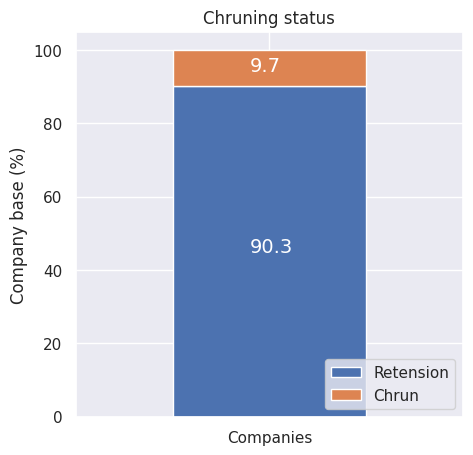

'\nWhy we use it:\nTransposing the data might be necessary for the plot because some plotting functions expect the data to be in a specific format (e.g., rows as categories and columns as values).\nFor stacked bar plots, it\'s often useful to have each category (e.g., "Churned", "Not Churned") as a separate series in columns, and each individual bar as a data point.\n'

In [20]:
plot_stacked_bars(churn_percentage.transpose(), "Chruning status", (5,5), legend_= "lower right")

"""
This method transposes the churn_percentage DataFrame. The .transpose() function in pandas swaps the rows and columns of the DataFrame.
"""
"""
Why we use it:
Transposing the data might be necessary for the plot because some plotting functions expect the data to be in a specific format (e.g., rows as categories and columns as values).
For stacked bar plots, it's often useful to have each category (e.g., "Churned", "Not Churned") as a separate series in columns, and each individual bar as a data point.
"""

About 10% of the total customers have churned(This sounds about right)

## Sales channel

In [21]:
channel = client_df[['id', 'channel_sales', 'churn']]
channel = channel.groupby([channel['channel_sales'], channel['churn']])['id'].count().unstack(level=1).fillna(0)
channel_churn = (channel.div(channel.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

"""
📌 groupby([channel['channel_sales'], channel['churn']]):
Groups data by sales channel and churn status.
For each unique combination of (channel, churn), we want to count something.
📌 ['id'].count():
Counts how many clients ('id') fall into each group.
So now, we know:
➤ How many clients from each channel churned
➤ How many did not churn
📌 .unstack(level=1):
Moves the churn status from rows to columns.
📌 .fillna(0):
If any group has no clients in a churn category, it will be filled with 0 instead of NaN.
"""

"\n📌 groupby([channel['channel_sales'], channel['churn']]):\nGroups data by sales channel and churn status.\nFor each unique combination of (channel, churn), we want to count something.\n📌 ['id'].count():\nCounts how many clients ('id') fall into each group.\nSo now, we know:\n➤ How many clients from each channel churned\n➤ How many did not churn\n📌 .unstack(level=1):\nMoves the churn status from rows to columns.\n📌 .fillna(0):\nIf any group has no clients in a churn category, it will be filled with 0 instead of NaN.\n"

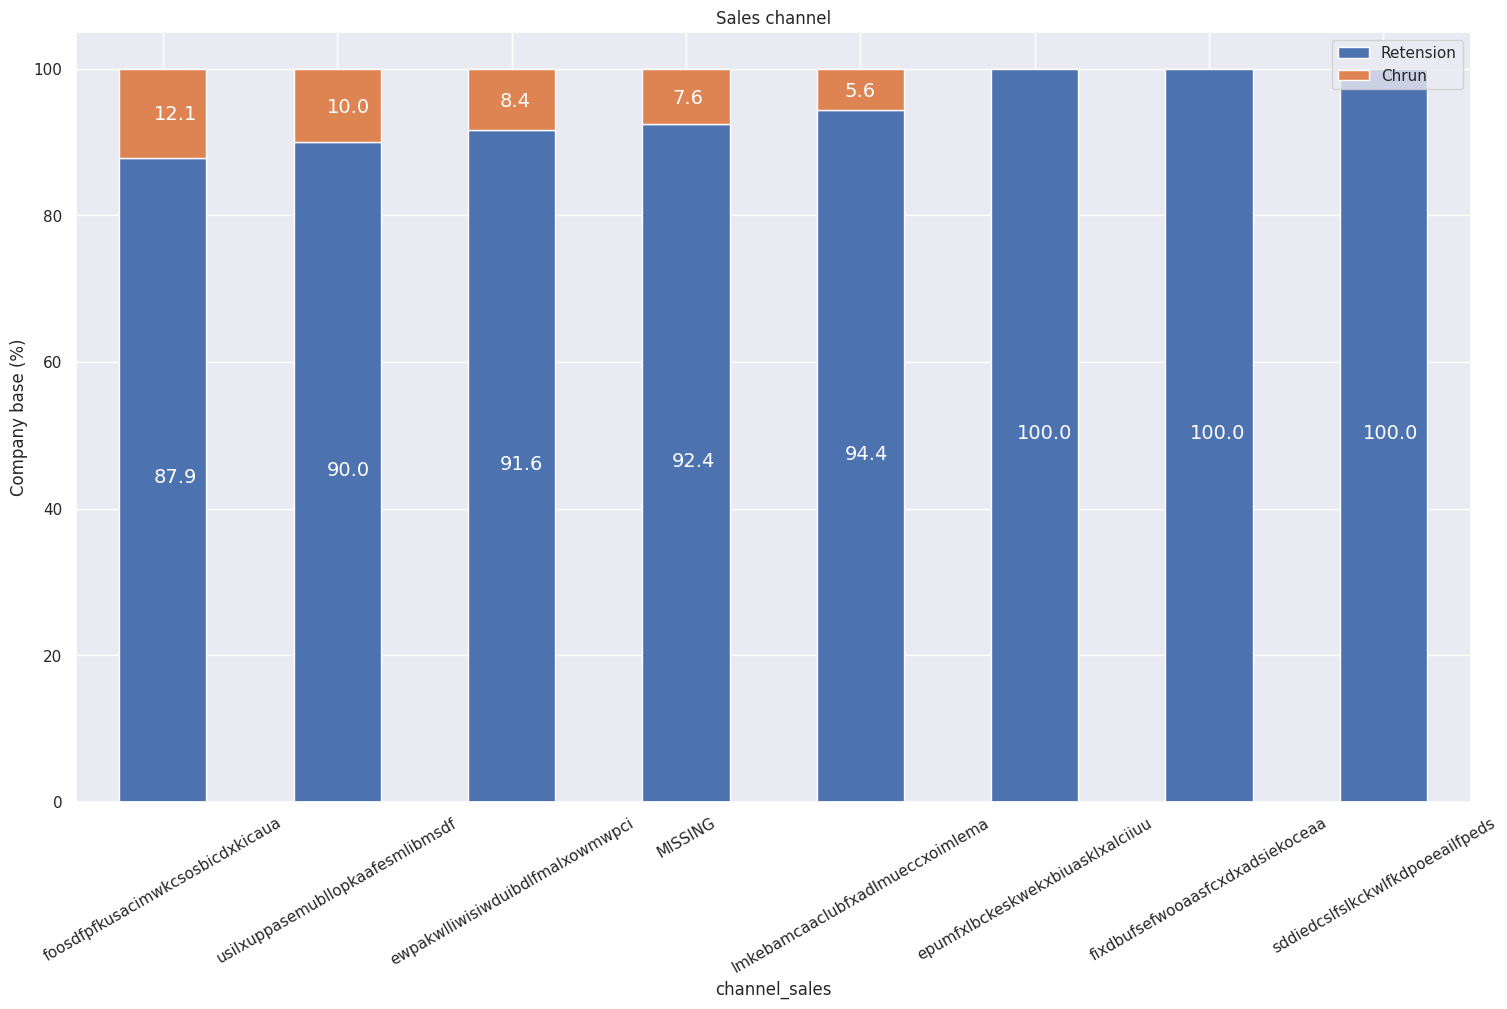

In [22]:
plot_stacked_bars(channel_churn, 'Sales channel', rot_ = 30)

Interestingly, the churning customers are distributed over 5 different values for `channel_sales`. As well as this, the value of `MISSING` has a churn rate of 7.6%. `MISSING` indicates a missing value and was added by the team when they were cleaning the dataset. This feature could be an important feature when it comes to building our model.

### Consumption

Let's see the distribution of the consumption in the last year and month. Since the consumption data is univariate, let's use histograms to visualize their distribution.

In [23]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

In [29]:
def plot_distribution(dataframe, column,ax,bins_ = 50):
  """
  Plot variable distribution in a stacked histogram of churned or retained company
  """
  # Create a temporal dataframes with the data to be plot
  temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
                       "Churn": dataframe[dataframe["churn"]==1][column]})
  # Plot the histogram
  temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
  # X-axis label
  ax.set_xlabel(column)
  # Change the x-axis to plain style
  ax.ticklabel_format(style='plain', axis='x')

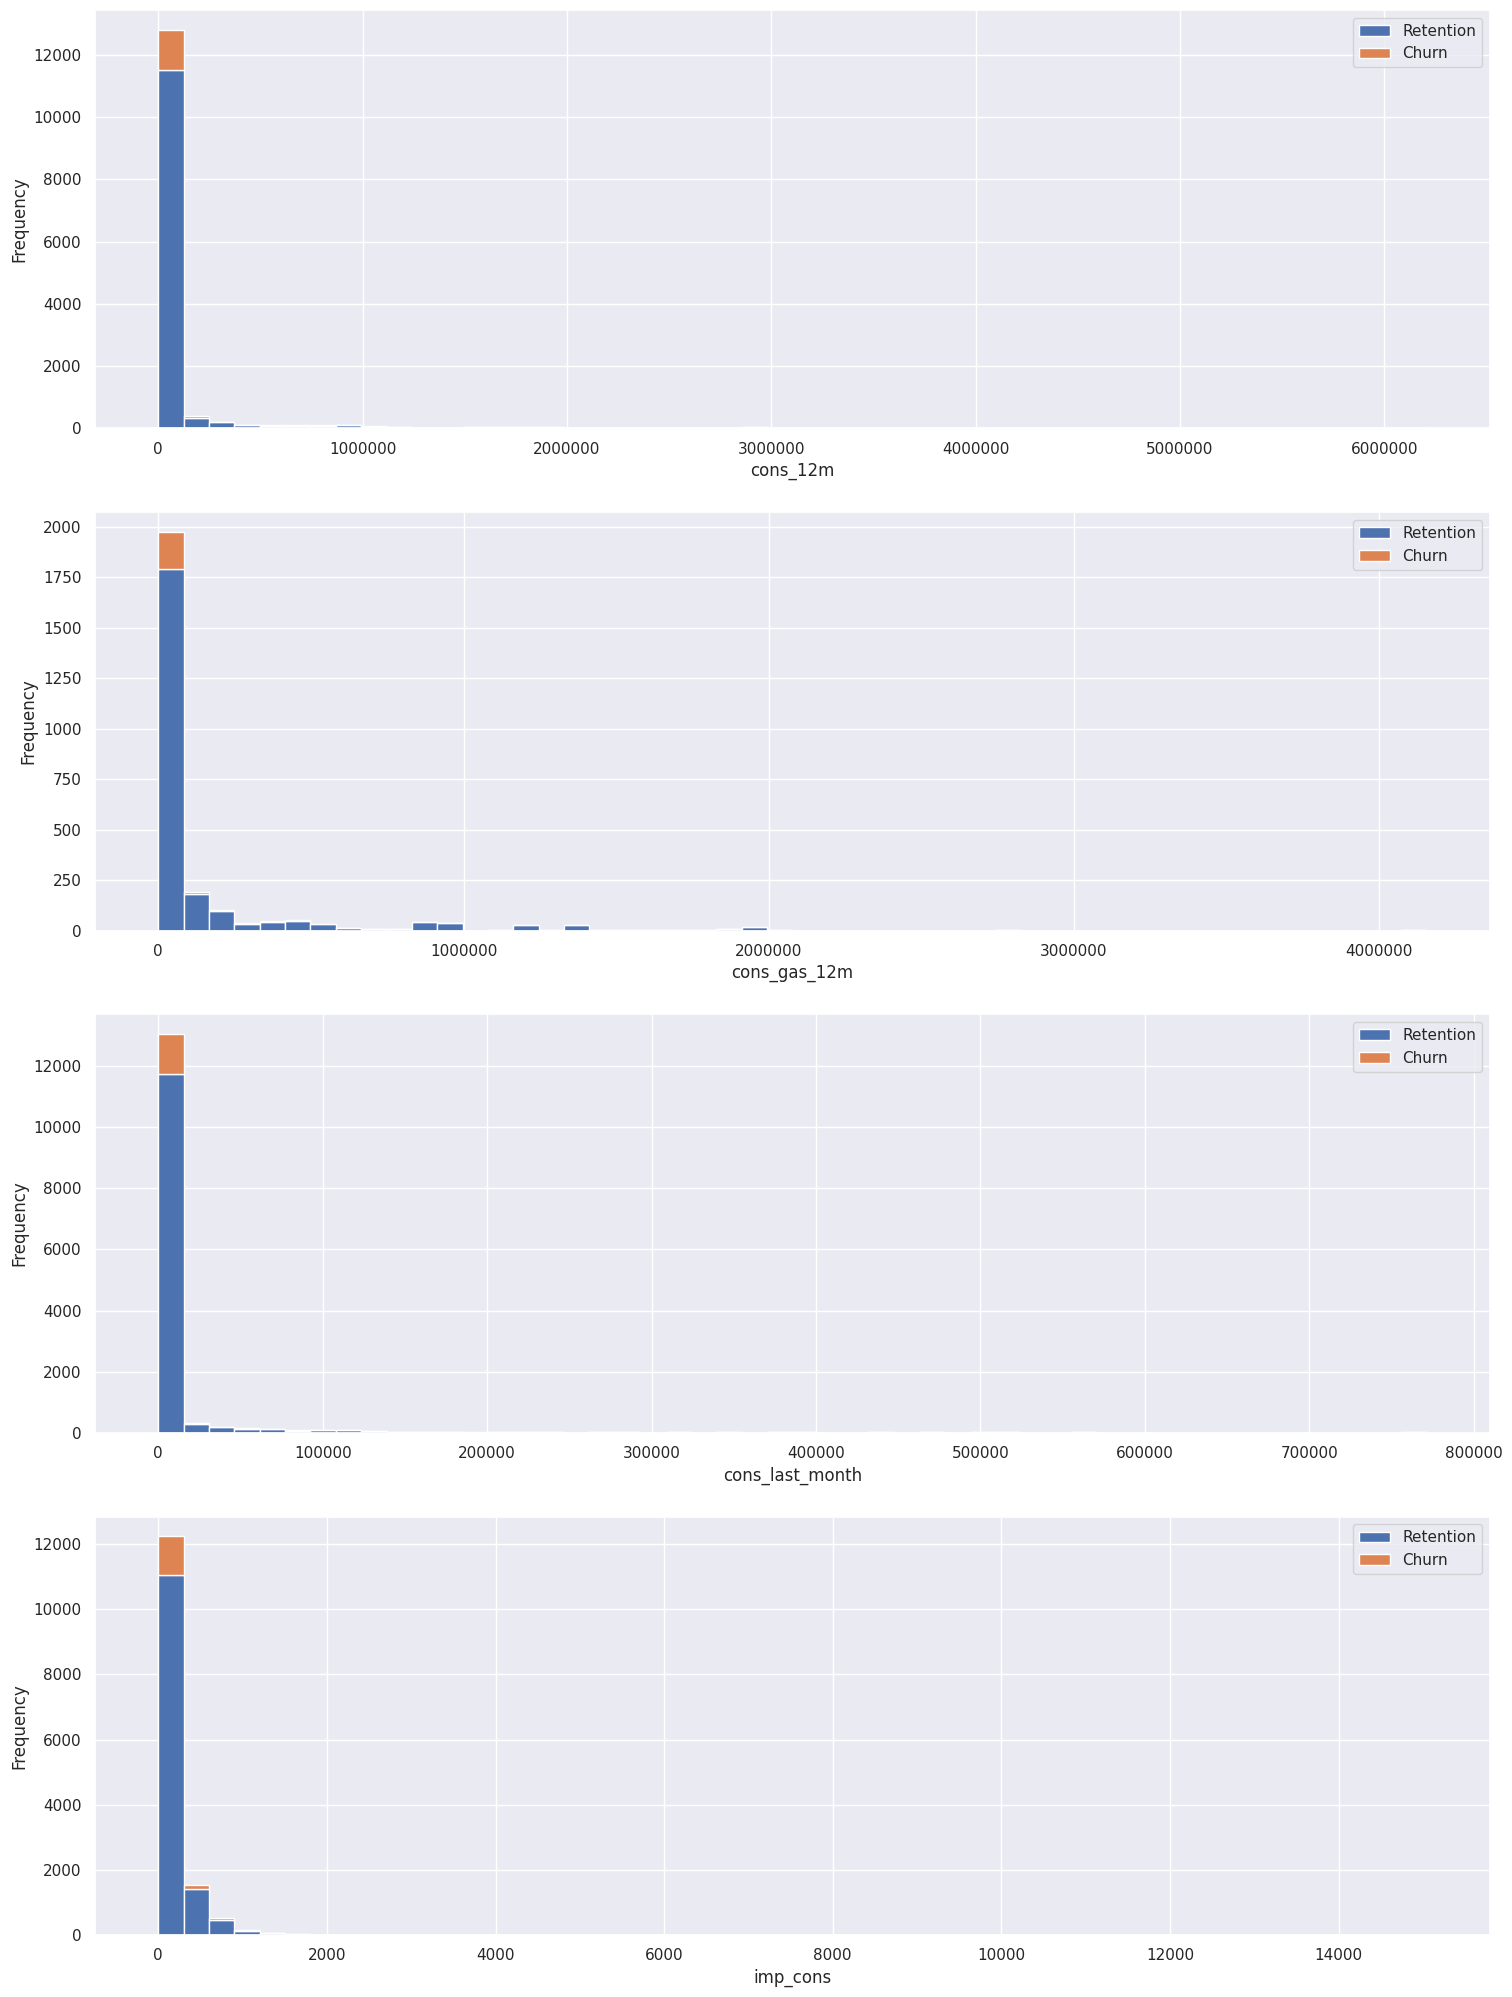

In [30]:
fig, axs = plt.subplots(nrows=4, figsize=(18, 25))

plot_distribution(consumption, 'cons_12m', axs[0])
plot_distribution(consumption[consumption['has_gas'] == 't'], 'cons_gas_12m', axs[1])
plot_distribution(consumption, 'cons_last_month', axs[2])
plot_distribution(consumption, 'imp_cons', axs[3])

Clearly, the consumption data is highly positively skewed, presenting a very long right-tail towards the higher values of the distribution. The values on the higher and lower end of the distribution are likely to be outliers. We can use a standard plot to visualise the outliers in more detail. A boxplot is a standardized way of displaying the distribution based on a five number summary:
- Minimum
- First quartile (Q1)
- Median
- Third quartile (Q3)
- Maximum

It can reveal outliers and what their values are. It can also tell us if our data is symmetrical, how tightly our data is grouped and if/how our data is skewed.

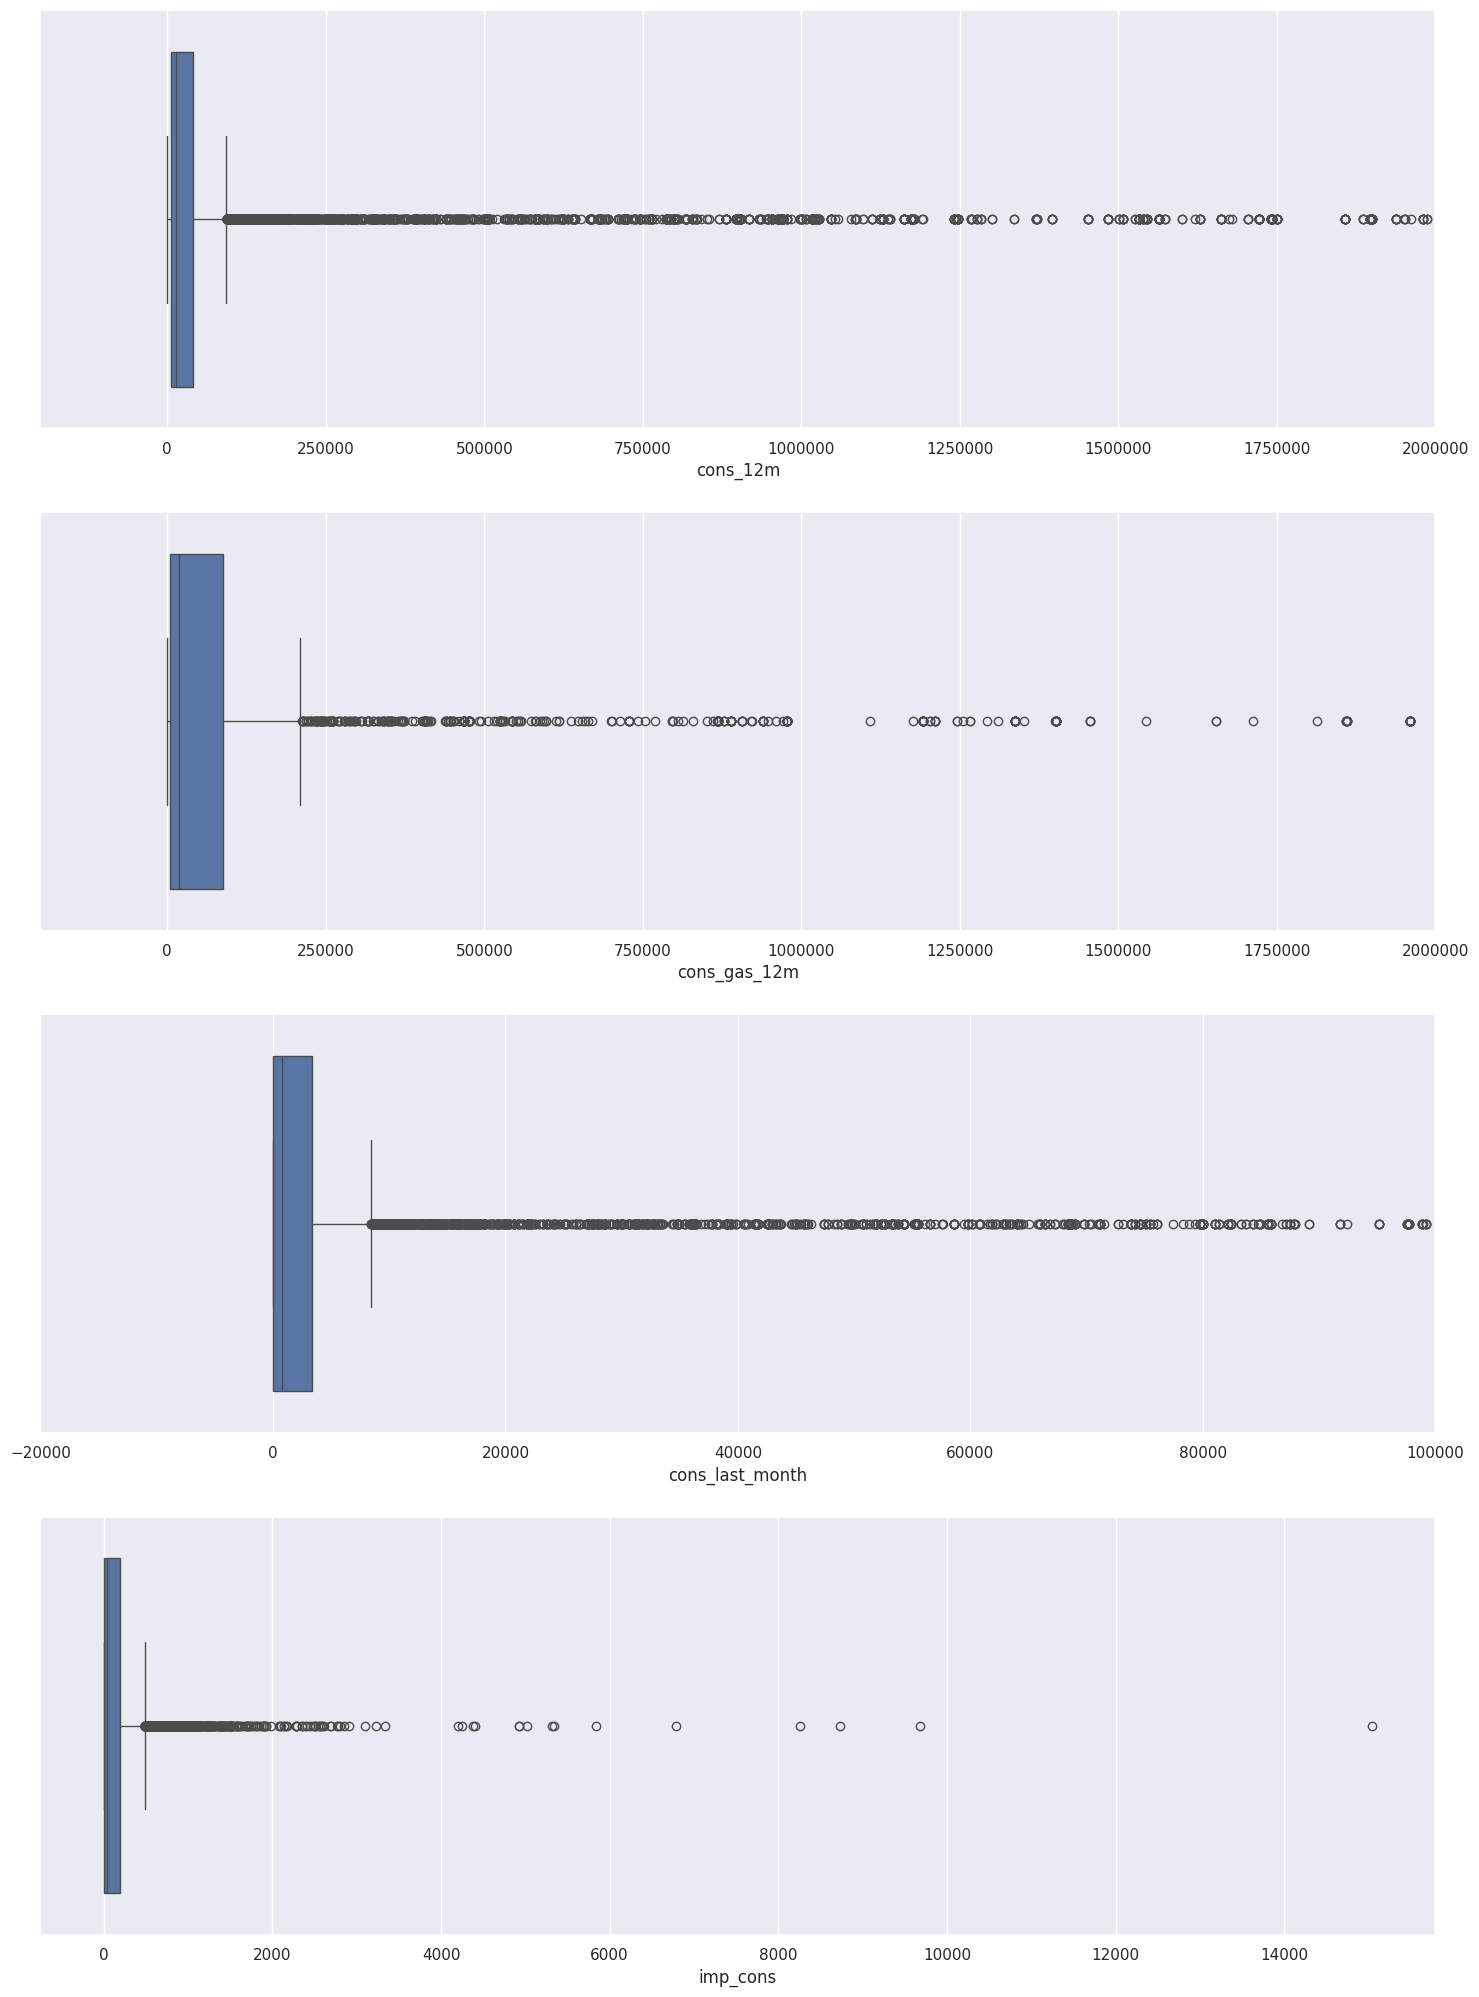

In [33]:
fig, axs = plt.subplots(nrows=4, figsize=(18,25))

# Plot histogram
sns.boxplot(x=consumption["cons_12m"], ax=axs[0]) # Changed to x=consumption["cons_12m"]
sns.boxplot(x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"], ax=axs[1]) # Changed to x=consumption[consumption["has_gas"] == "t"]["cons_gas_12m"]
sns.boxplot(x=consumption["cons_last_month"], ax=axs[2]) # Changed to x=consumption["cons_last_month"]
sns.boxplot(x=consumption["imp_cons"], ax=axs[3]) # Changed to x=consumption["imp_cons"]

# Remove scientific notation
for ax in axs:
    ax.ticklabel_format(style='plain', axis='x')
    # Set x-axis limit
    axs[0].set_xlim(-200000, 2000000)
    axs[1].set_xlim(-200000, 2000000)
    axs[2].set_xlim(-20000, 100000)
plt.show()

We will deal with skewness and outliers during feature engineering in the next exercise.

### Forecast

In [34]:
forecast = client_df[
    ["id", "forecast_cons_12m",
    "forecast_cons_year","forecast_discount_energy","forecast_meter_rent_12m",
    "forecast_price_energy_off_peak","forecast_price_energy_peak",
    "forecast_price_pow_off_peak","churn"
    ]
]

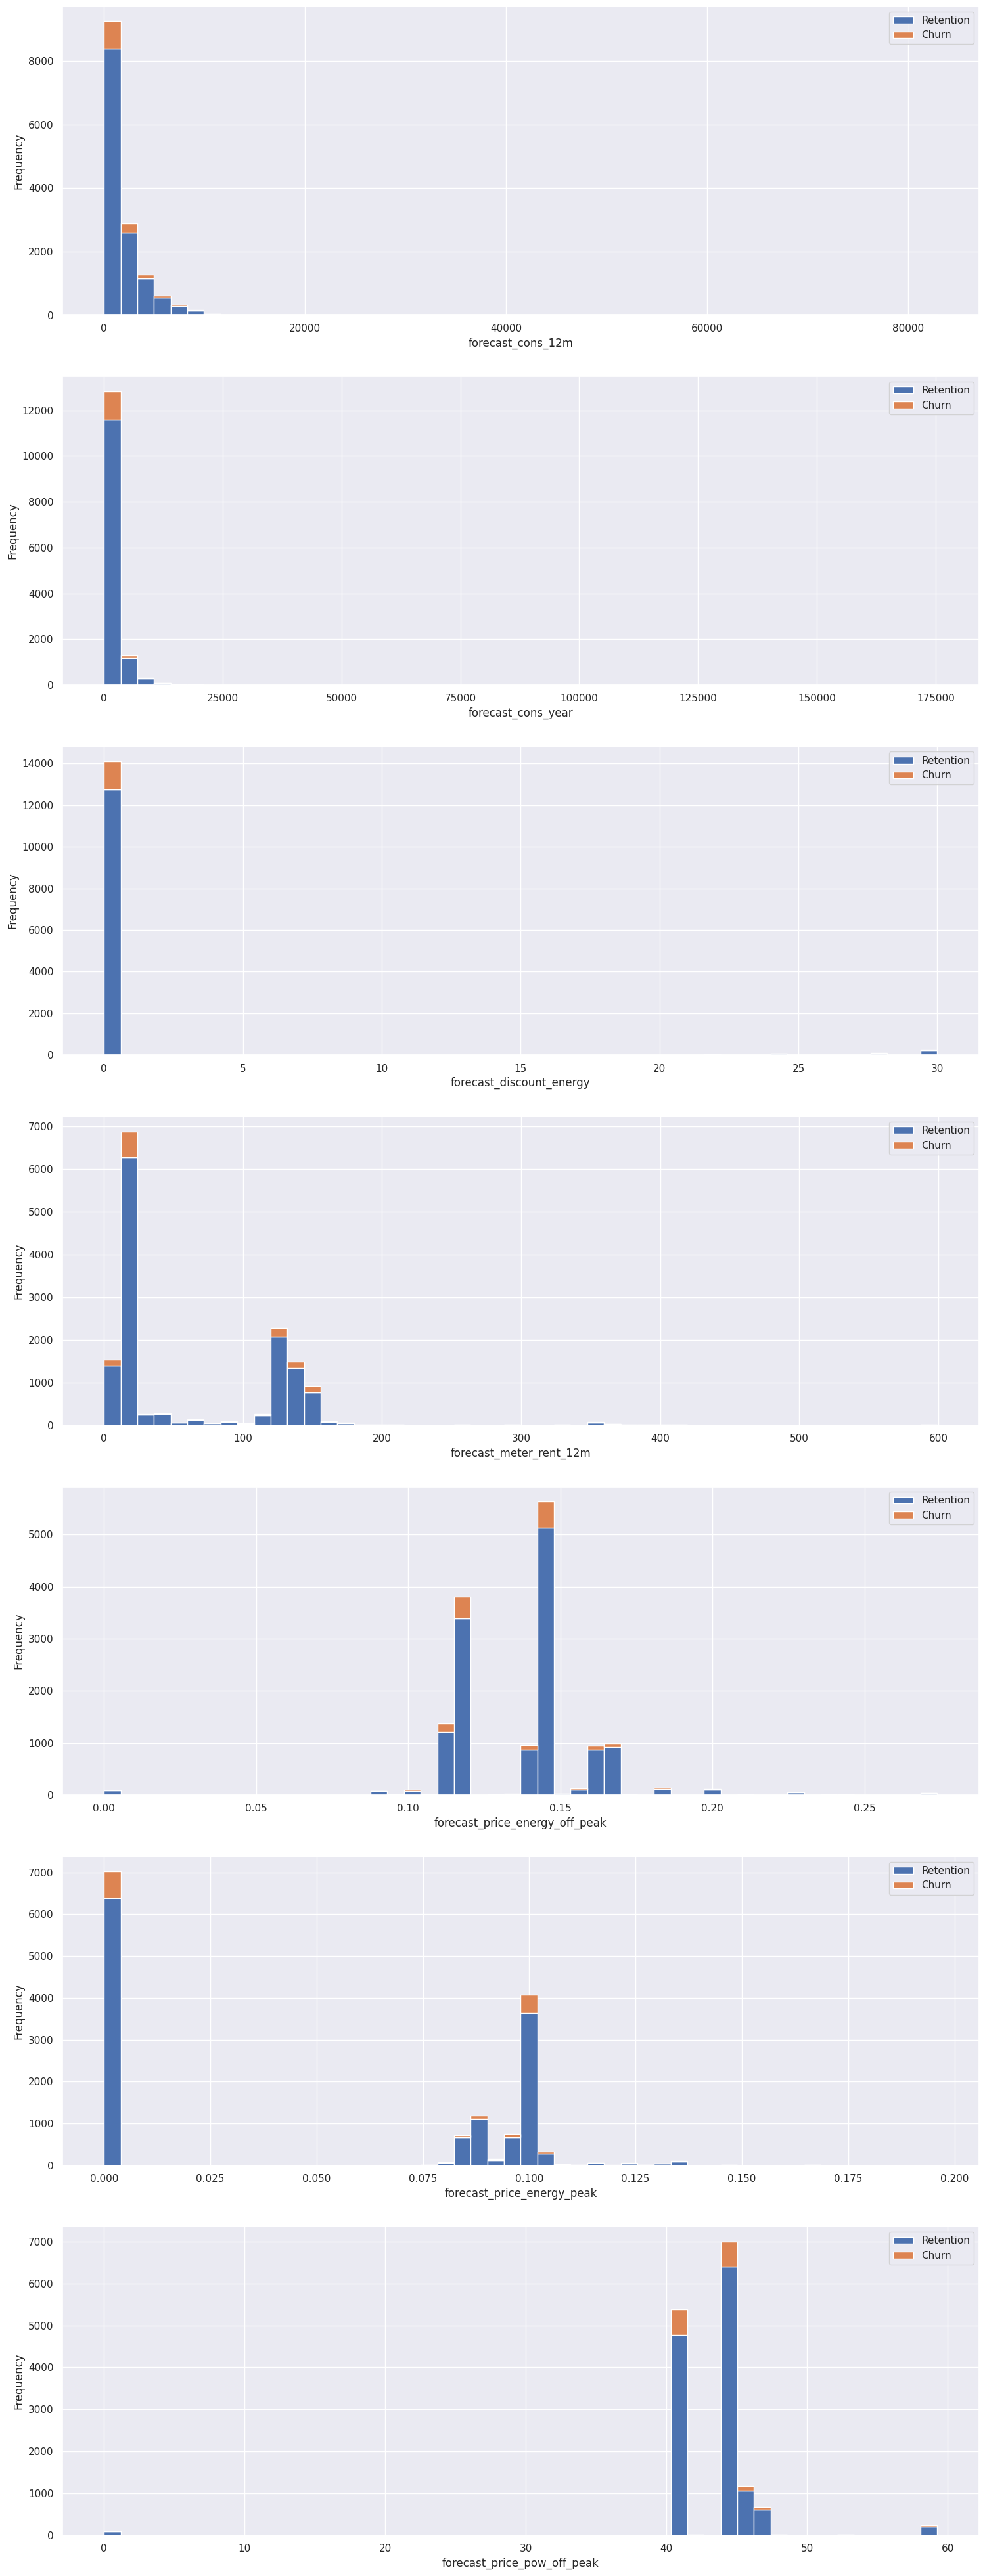

In [35]:
fig, axs = plt.subplots(nrows=7, figsize=(18,50))

# Plot histogram
plot_distribution(client_df, "forecast_cons_12m", axs[0])
plot_distribution(client_df, "forecast_cons_year", axs[1])
plot_distribution(client_df, "forecast_discount_energy", axs[2])
plot_distribution(client_df, "forecast_meter_rent_12m", axs[3])
plot_distribution(client_df, "forecast_price_energy_off_peak", axs[4])
plot_distribution(client_df, "forecast_price_energy_peak", axs[5])
plot_distribution(client_df, "forecast_price_pow_off_peak", axs[6])

Similarly to the consumption plots, we can observe that a lot of the variables are highly positively skewed, creating a very long tail for the higher values. We will make some transformations during the next exercise to correct for this skewness.

### Contract type

In [36]:
contract_type = client_df[['id', 'has_gas', 'churn']]
contract = contract_type.groupby([contract_type['churn'], contract_type['has_gas']])['id'].count().unstack(level=0)
contract_percentage = (contract.div(contract.sum(axis=1), axis=0) * 100).sort_values(by=[1], ascending=False)

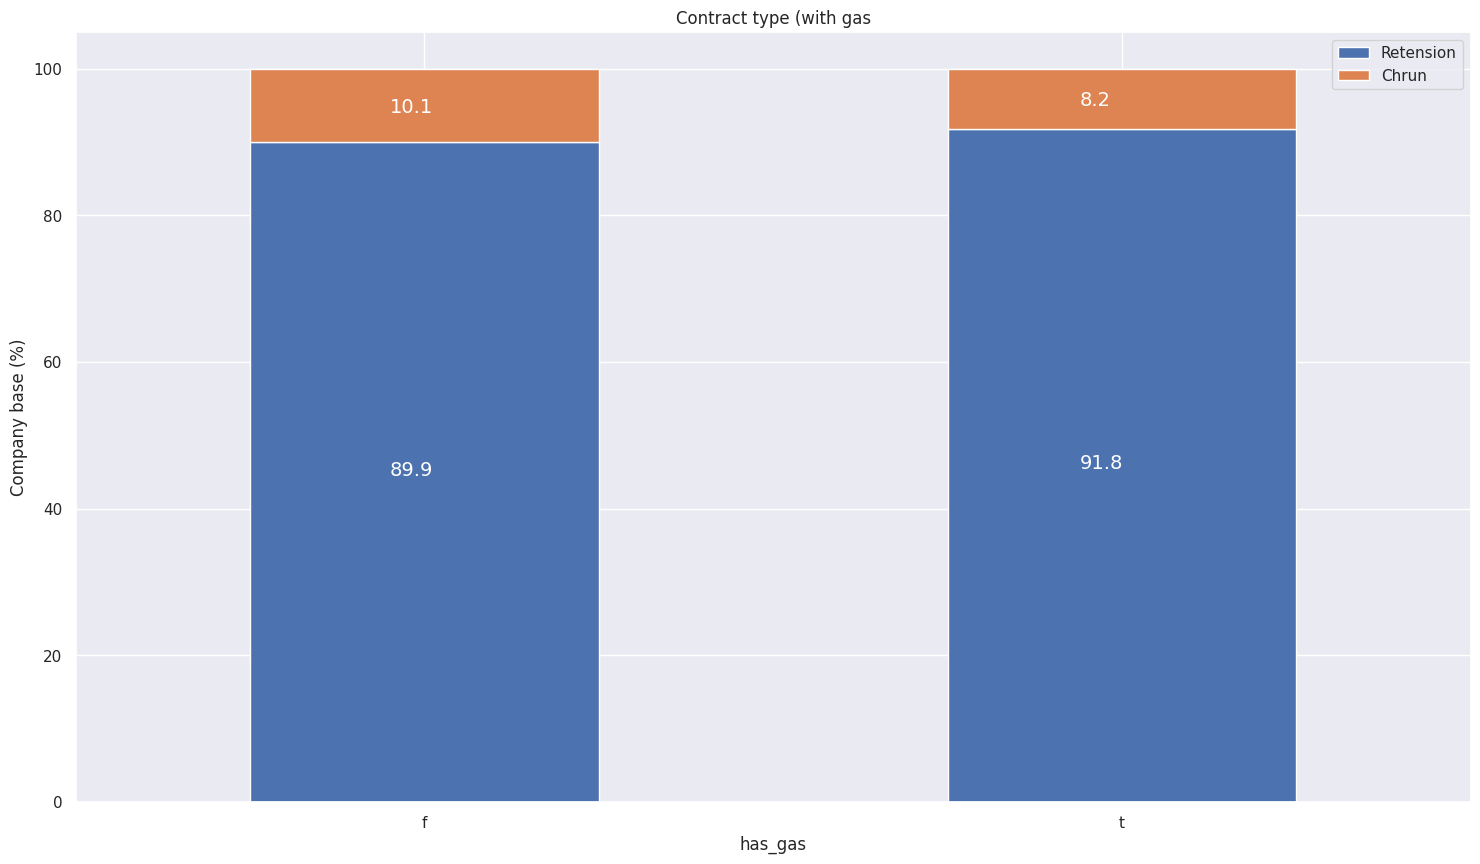

In [37]:
plot_stacked_bars(contract_percentage, 'Contract type (with gas')

### Margins

In [38]:
margin = client_df[['id', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']]

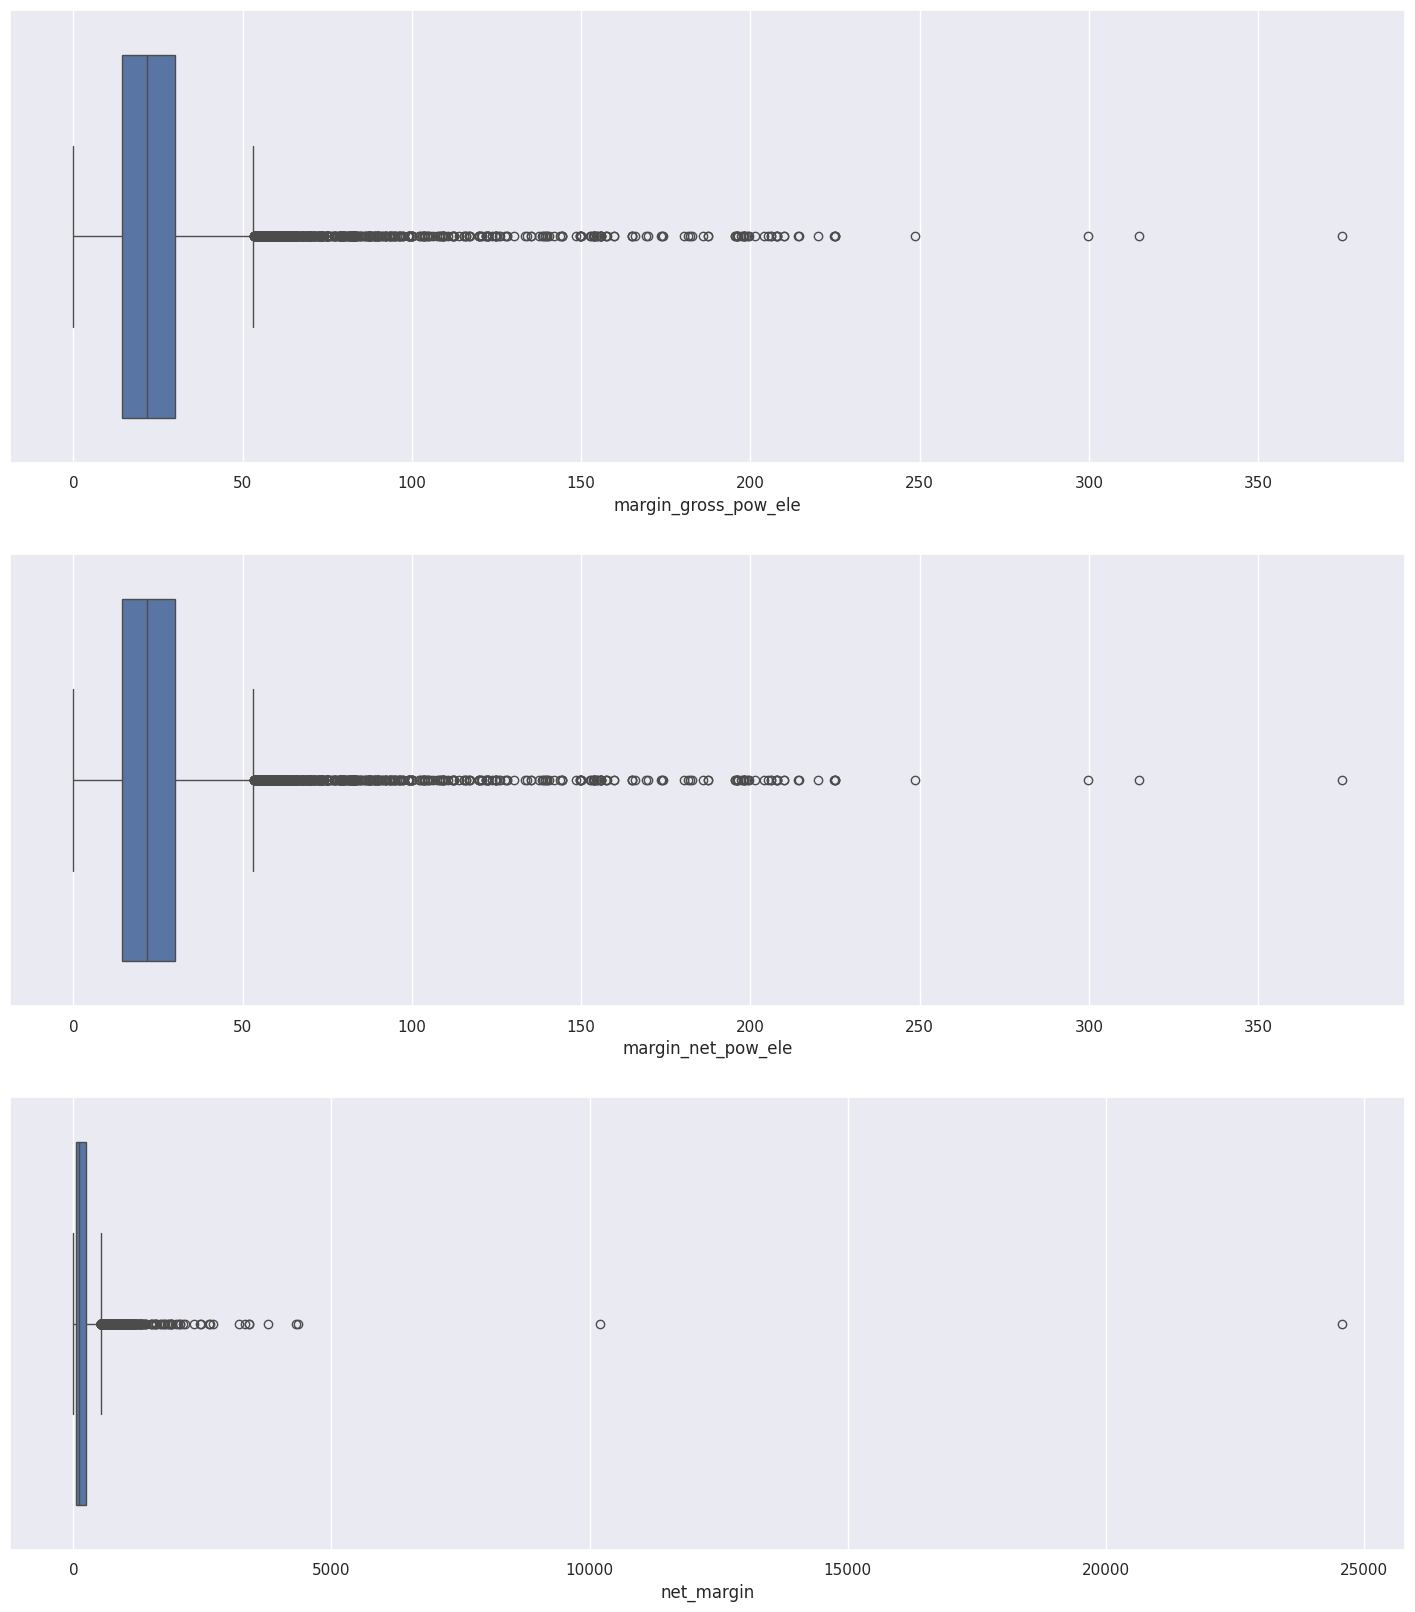

In [40]:
fig, axs = plt.subplots(nrows=3, figsize=(18,20))
# Plot histogram
sns.boxplot(x=margin["margin_gross_pow_ele"], ax=axs[0]) # Changed to x=margin["margin_gross_pow_ele"]
sns.boxplot(x=margin["margin_net_pow_ele"],ax=axs[1]) # Changed to x=margin["margin_net_pow_ele"]
sns.boxplot(x=margin["net_margin"], ax=axs[2]) # Changed to x=margin["net_margin"]
# Remove scientific notation
axs[0].ticklabel_format(style='plain', axis='x')
axs[1].ticklabel_format(style='plain', axis='x')
axs[2].ticklabel_format(style='plain', axis='x')
plt.show()

We can see some outliers here as well which we will deal with in the next exercise.

### Subscribed power

In [41]:
power = client_df[['id', 'pow_max', 'churn']]

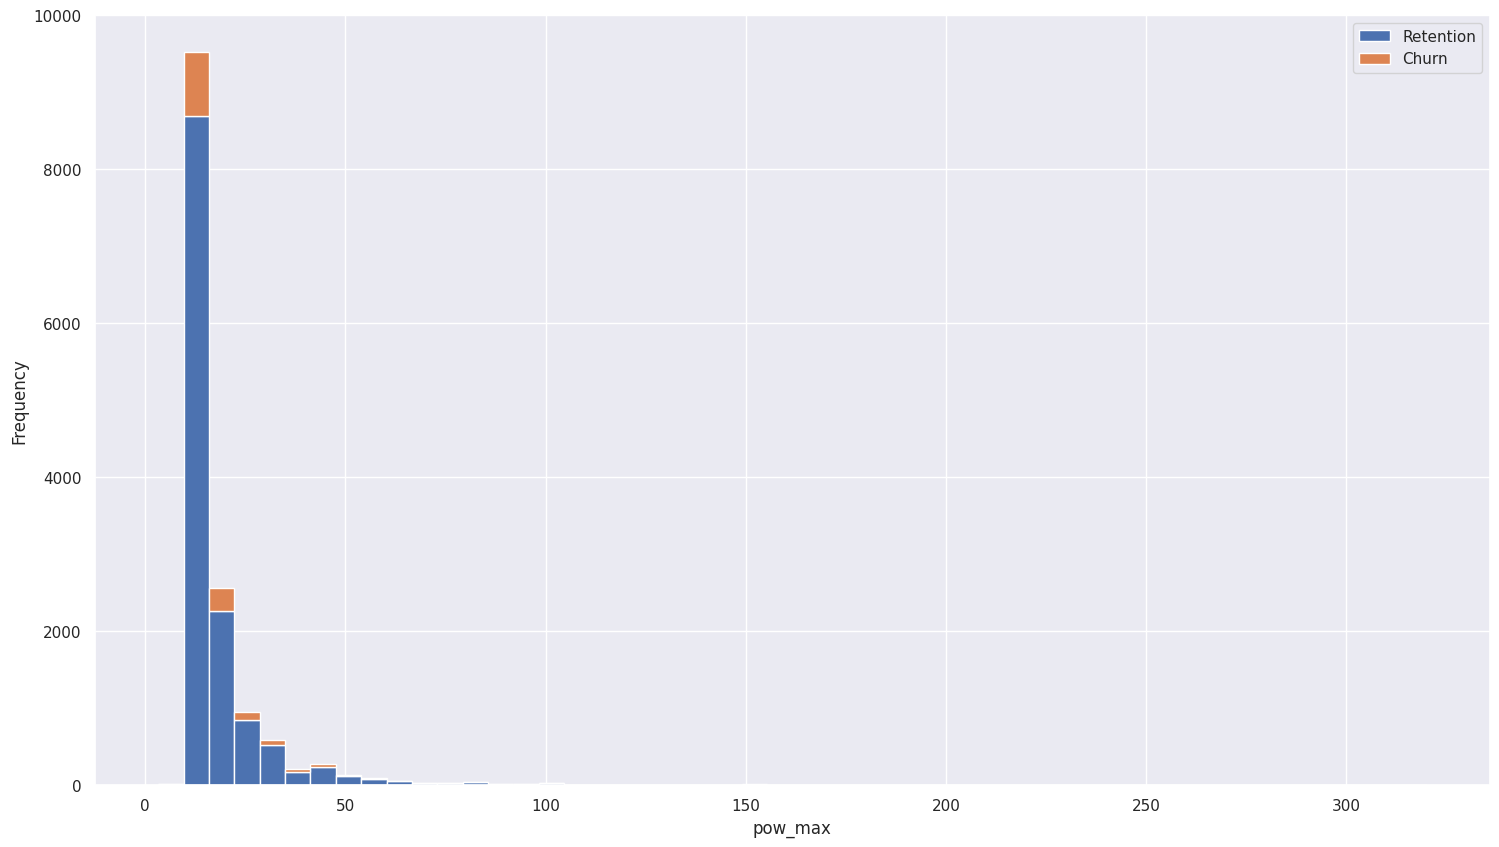

In [42]:
fig, axs = plt.subplots(nrows=1, figsize=(18, 10))
plot_distribution(power, 'pow_max', axs)

### Other coloumns

In [43]:
others = client_df[['id', 'nb_prod_act', 'num_years_antig', 'origin_up', 'churn']]
products = others.groupby([others["nb_prod_act"],others["churn"]])["id"].count().unstack(level=1)
products_percentage = (products.div(products.sum(axis=1), axis=0)*100).sort_values(by=[1], ascending=False)

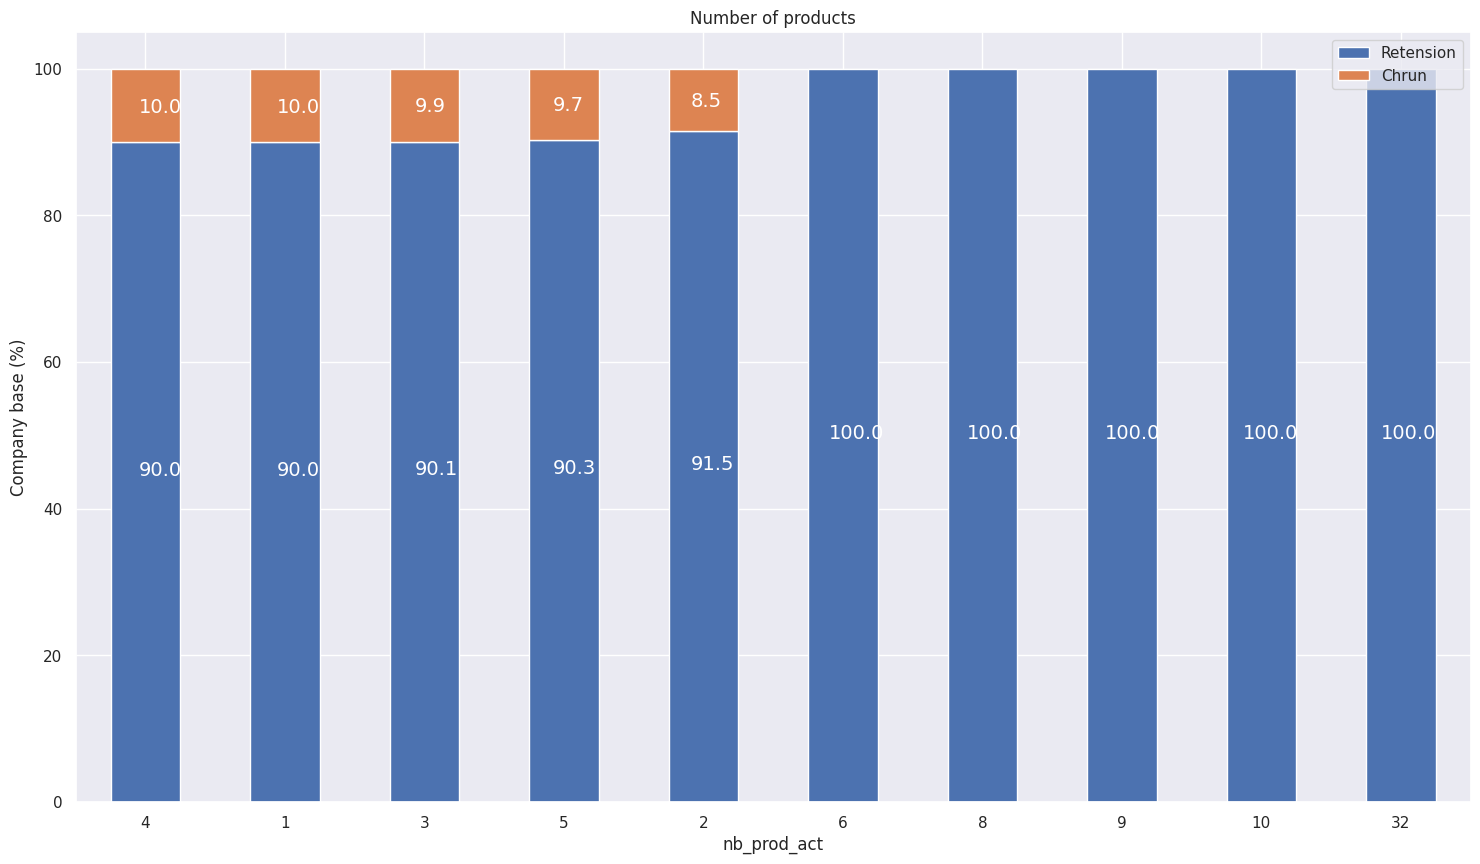

In [44]:
plot_stacked_bars(products_percentage, "Number of products")

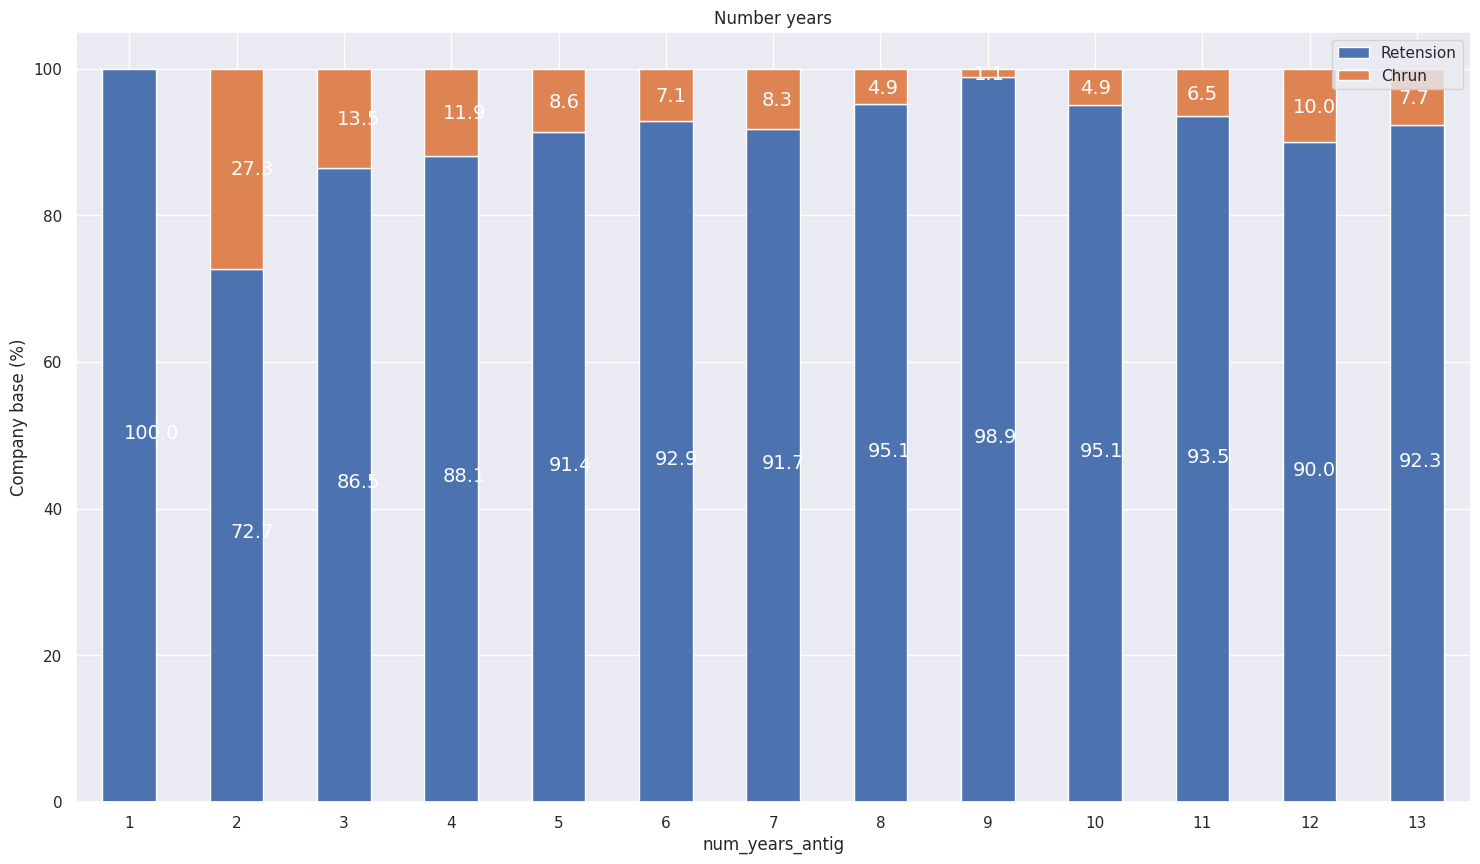

In [45]:
years_antig = others.groupby([others["num_years_antig"],others["churn"]])["id"].count().unstack(level=1)
years_antig_percentage = (years_antig.div(years_antig.sum(axis=1), axis=0)*100)
plot_stacked_bars(years_antig_percentage, "Number years")

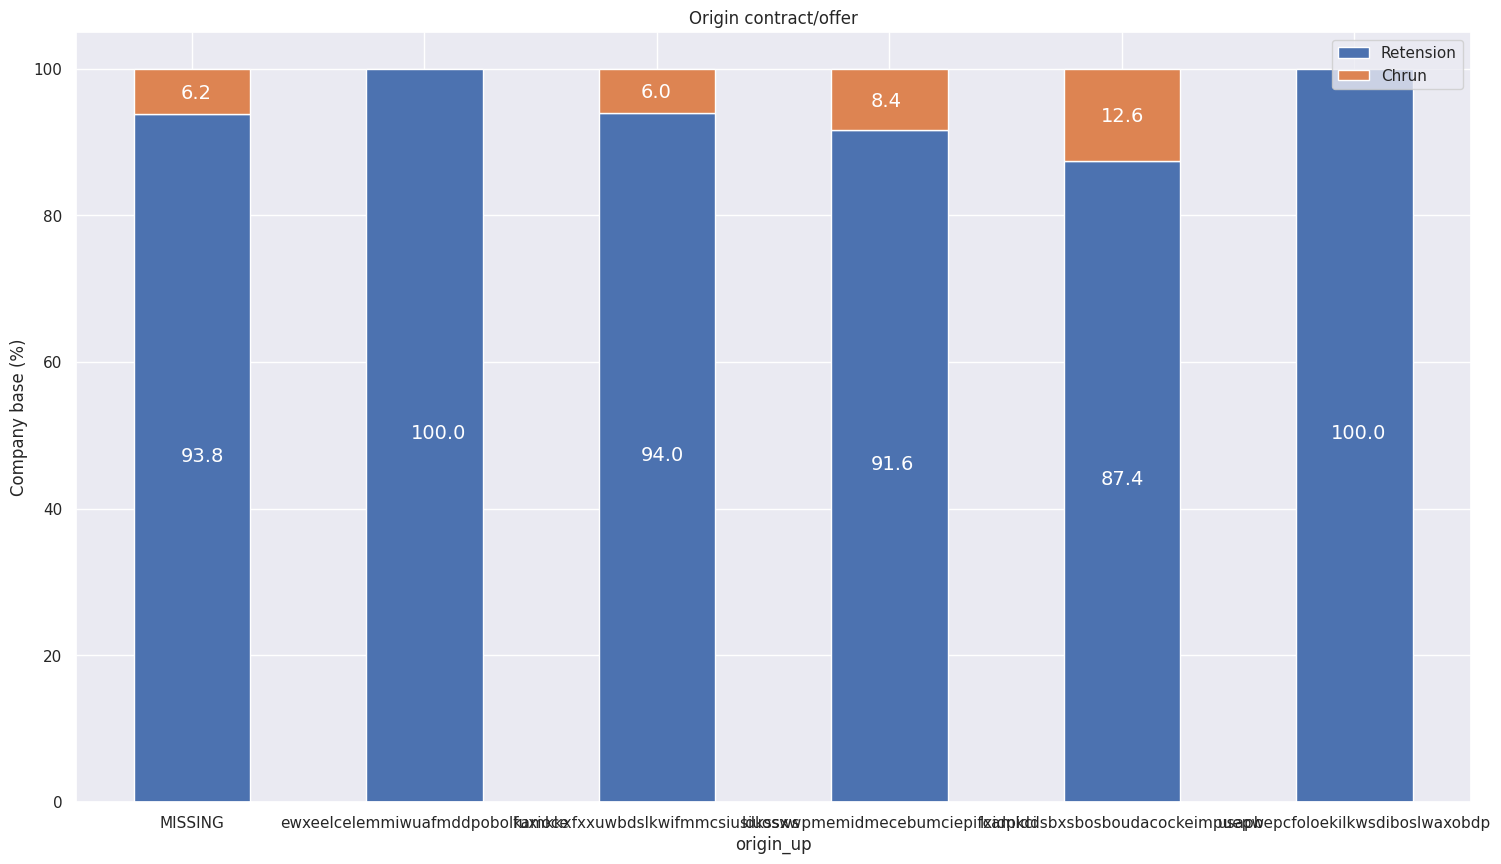

In [46]:
origin = others.groupby([others["origin_up"],others["churn"]])["id"].count().unstack(level=1)
origin_percentage = (origin.div(origin.sum(axis=1), axis=0)*100)
plot_stacked_bars(origin_percentage, "Origin contract/offer")